In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt
import squarify # pip install squarify (algorithm for treemap)

from scipy import stats
from functools import partial

from datetime import datetime

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Creamos el dataframe y le asignamos como id del dataframe, el id de cada row del csv.
df = pd.read_csv('train_transformed.csv', index_col='id')

In [ ]:
#TREEMAP

#https://python-graph-gallery.com/201-control-the-color-of-treemap/
#https://python-graph-gallery.com/200-basic-treemap-with-python/
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
#https://mubaris.com/posts/dataviz-treemaps/

In [ ]:
# Analizo (C)
# Hay una cierta probabilidad de que al exisitir centros comerciales cercanos tambien existiran
# escuelas cercanas y viceversa.

df_aux = df[['centroscomercialescercanos', 'escuelascercanas']]
df_aux = df_aux.groupby(['centroscomercialescercanos', 'escuelascercanas']).apply(lambda x: x.count())
df_aux = pd.DataFrame(df_aux.escuelascercanas, columns=['escuelascercanas'])

df_aux.columns = ['cantidad']
df_aux['porcentaje'] = round(100*df_aux['cantidad'] / len(df), 2)

In [65]:
df_aux.escuelascercanas

centroscomercialescercanos  escuelascercanas
False                       False               126153
                            True                 18679
True                        False                 7253
                            True                 87915
Name: escuelascercanas, dtype: int64

In [67]:
df_aux

cantidad  porcentaje
centroscomercialescercanos escuelascercanas                      
False                      False               126153       52.56
                           True                 18679        7.78
True                       False                 7253        3.02
                           True                 87915       36.63

In [ ]:
comercios = list(df_aux.index.codes)[0].tolist()
escuelas = list(df_aux.index.codes)[1].tolist()
names = list(df_aux.index.names)

In [15]:
grupos = []

for i in zip(comercios, escuelas): 
    
    str = 'SI ' if i[0] else 'NO '        
    str += names[0]
    
    str += ',\n SI ' if i[1] else ',\n NO '        
    str += names[1]
    
    grupos.append(str)

grupos

['NO centroscomercialescercanos,\n NO escuelascercanas',
 'NO centroscomercialescercanos,\n SI escuelascercanas',
 'SI centroscomercialescercanos,\n NO escuelascercanas',
 'SI centroscomercialescercanos,\n SI escuelascercanas']

In [20]:
grupos = []
legendas = []
index = 0

for i in zip(comercios, escuelas): 
    titulo = ""
    legenda = ""
    if i[0] and i[1]:
        legenda = 'AMBOS'
    elif not i[0] and i[1]:
        legenda = 'SOLO\nESCUELAS'
    elif i[0] and not i[1]:
        legenda = 'SOLO\nCOMERCIOS'
    elif not i[0] and not i[1]:
        legenda = 'NINGUNO'
        
    legendas.append(legenda)
    grupos.append("{:.2f}%".format(df_aux.porcentaje.tolist()[index]))
    index += 1

print(grupos)
print(legendas)

['52.56%', '7.78%', '3.02%', '36.63%']
['NINGUNO', 'SOLO\nESCUELAS', 'SOLO\nCOMERCIOS', 'AMBOS']


In [ ]:
treemap_labels = []
for item in zip(legendas,grupos):
    treemap_labels.append(item[0] + "\n" + item[1])

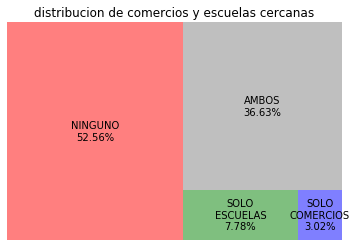

In [32]:
squarify.plot(sizes=df_aux.porcentaje.tolist(), 
              label=treemap_labels, 
              color=["red","green","blue", "grey"], alpha=.5)
plt.title("distribucion de comercios y escuelas cercanas")
plt.axis('off')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

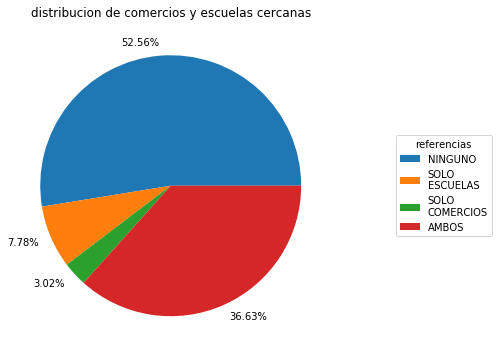

In [22]:
df_pie_chart = pd.DataFrame(aux['porcentaje'])
df_pie_chart.index = grupos

df_pie_chart.plot.pie(y='porcentaje', figsize=(6, 6))
plt.legend(legendas, title="referencias", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("distribucion de comercios y escuelas cercanas")
plt.axis('off')

#FALTA ELEGIR COLORES !!!!!!

#LEER!!!
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
    
#aux = aux.rename(index = {0:'a', 1:'b', 2:'c', 3:'d'})
#de cada elemento [K:V] busca en cada indice del DF el valor de K y lo reemplaza por V

In [ ]:
# me es dificil pensar en un grafico sencillo de entender porque estoy queriendo combinar 2 features distintas 
# que pueden tomar distintos estados ( ya es dificil para valores booleanos, peor si fuese categoricos )
# 
# Los nombre de las leyendas quedan muy feos, los remplazo por unos creados a mano
#

In [56]:
df_aux = df[['gimnasio', 'usosmultiples', 'piscina']]
df_aux = df_aux.groupby(['gimnasio', 'usosmultiples', 'piscina']).apply(lambda x: x.count())
df_aux.gimnasio

gimnasio  usosmultiples  piscina
False     False          False      206412
                         True        11709
          True           False        4988
                         True         1897
True      False          False        5618
                         True         3039
          True           False        2010
                         True         4327
Name: gimnasio, dtype: int64

In [38]:
# Analizo (D)
# Hay una probabilidad medianamente elevada de que la propiedad disponga 
# de gimnasio, usosmultiples y piscina a la vez. Al ser features booleanas un scatter plot no nos dara info relevante.

df_aux = df[['gimnasio', 'usosmultiples', 'piscina']]
df_aux = df_aux.groupby(['gimnasio', 'usosmultiples', 'piscina']).apply(lambda x: x.count())
df_aux = pd.DataFrame(df_aux.gimnasio, columns=['gimnasio'])

df_aux.columns = ['cantidad']
df_aux['porcentaje'] = round(100*df_aux['cantidad'] / len(df), 2)
df_aux

cantidad  porcentaje
gimnasio usosmultiples piscina                      
False    False         False      206412       86.00
                       True        11709        4.88
         True          False        4988        2.08
                       True         1897        0.79
True     False         False        5618        2.34
                       True         3039        1.27
         True          False        2010        0.84
                       True         4327        1.80

In [ ]:
gims = list(df_aux.index.codes)[0].tolist()
usosMultiples = list(df_aux.index.codes)[1].tolist()
piscinas = list(df_aux.index.codes)[2].tolist()
names = list(df_aux.index.names)

In [40]:
index = 0
acum = 0.0

valores = []
titulos = []


for i in zip(gims, usosMultiples, piscinas):

    if i[0] and i[1] and i[2]:
        titulos.append('GIM + POOL + USOS.M.')
        #valores.append("{:.2f}".format(aux.porcentaje.tolist()[index]))
        valores.append(df_aux.porcentaje.tolist()[index])
        
    elif not i[0] and not i[1] and not i[2]:
        titulos.append('NINGUNO')
        #valores.append("{:.2f}".format(aux.porcentaje.tolist()[index]))
        valores.append(df_aux.porcentaje.tolist()[index])
    
    else:
        acum += df_aux.porcentaje.tolist()[index]
    
    index += 1

titulos.append('OTROS')
#valores.append("{:.2f}".format(acum))
valores.append(acum)

In [41]:
titulos

['NINGUNO', 'GIM + POOL + USOS.M.', 'OTROS']

In [42]:
valores

[86.0, 1.8, 12.2]

In [51]:
df_indexes = []
for valor in df_pie.valores.tolist():
    df_indexes.append("{:.2f}%".format(valor))

['86.00%', '1.80%', '12.20%']

In [52]:
df_pie = pd.DataFrame()
df_pie['valores'] = valores
df_pie['titulos'] = titulos
df_pie.index = df_indexes
df_pie

,valores,titulos
86.00%,86.00,NINGUNO
1.80%,1.80,GIM + POOL + USOS.M.
12.20%,12.20,OTROS


(-1.25, 1.25, -1.25, 1.25)

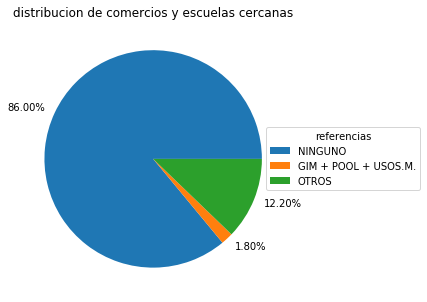

In [53]:
df_pie.plot.pie(y='valores', figsize=(5, 5))

plt.legend(titulos, title="referencias", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("distribucion de comercios y escuelas cercanas")
plt.axis('off')

#FALTA ELEGIR COLORES !!!!!!

In [ ]:
#
# IDEAS!
#
# AVERIGUAR COMO PODRIA CONTROLAR Y REMOVER PUBL QUE NO SON DE PROPIEDADES EN MEXICO POR LAS DUDAS
# EN PUNTO 2 HACER ANALISIS POR TIPOS DE PROPIEDAD (EJ: CASA, DPTO, DUPLEX, ETC) DEL ACUMULADO DE $ QUE DEJA CADA UNA.
# EN PUNTO 3 DEBERIA CONCENTRARME TAMBIEN EN LAS CASAS MAS BARATAS !
#